In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error

In [29]:
from sklearn.model_selection import train_test_split
prop = 'ehull'
df_ehull = pd.read_csv("./data/dataset_alignn_bert-base-uncased_chemnlp_prop_ehull.csv", index_col = 0)
# df_train_e, df_test_e = train_test_split(df_ehull, test_size = 0.1)
tr_mean = np.mean(df_ehull[prop].values)
n = len(df_ehull[prop].values)
mad = mean_absolute_error(df_ehull[prop].values, n * [tr_mean])
print(mad)

0.249074380117319


In [19]:
# MAD
props = ['ehull']

for prop in props:
    t_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_robo_prop_{prop}_test.csv"
    df_t = pd.read_csv(t_file_path, index_col = 0)

    tr_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_robo_prop_{prop}_train.csv"
    df_tr = pd.read_csv(tr_file_path, index_col = 0)
    
    v_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_robo_prop_{prop}_val.csv"
    df_v = pd.read_csv(v_file_path, index_col = 0)
    df_train = pd.concat([df_tr, df_v],axis = 0)
   
    tr_mean = np.mean(df_train[prop].values)
    n = len(df_t[prop].values)
    mad = mean_absolute_error(df_t[prop].values, n * [tr_mean])
    print(f"{prop} MAD: {mad}")
print(df_train.shape[0] + df_t.shape[0])


ehull MAD: 0.2549793606882786
38886


In [17]:
df_tr.shape

(44276, 1537)

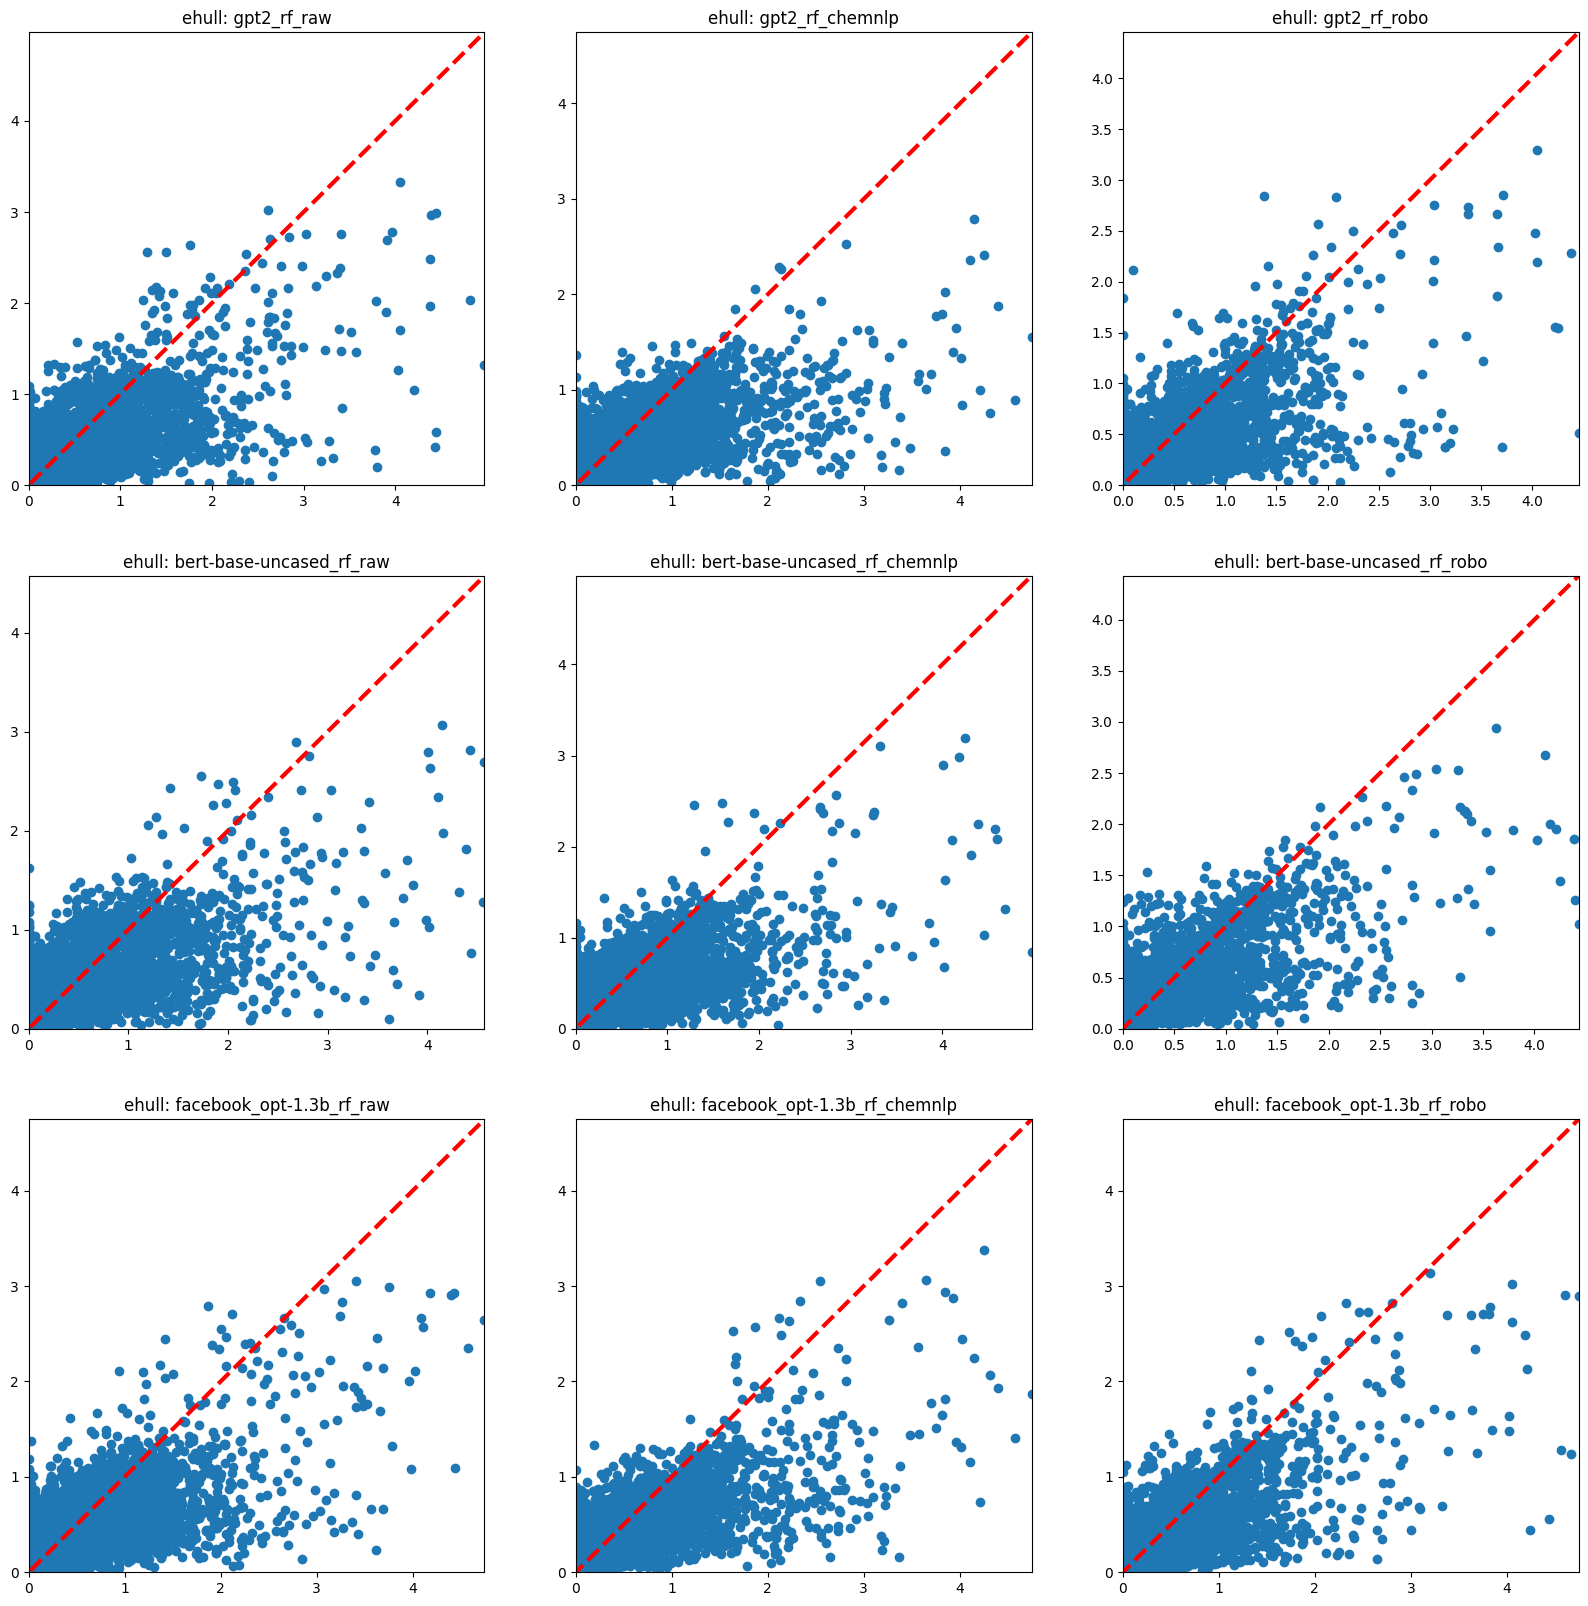

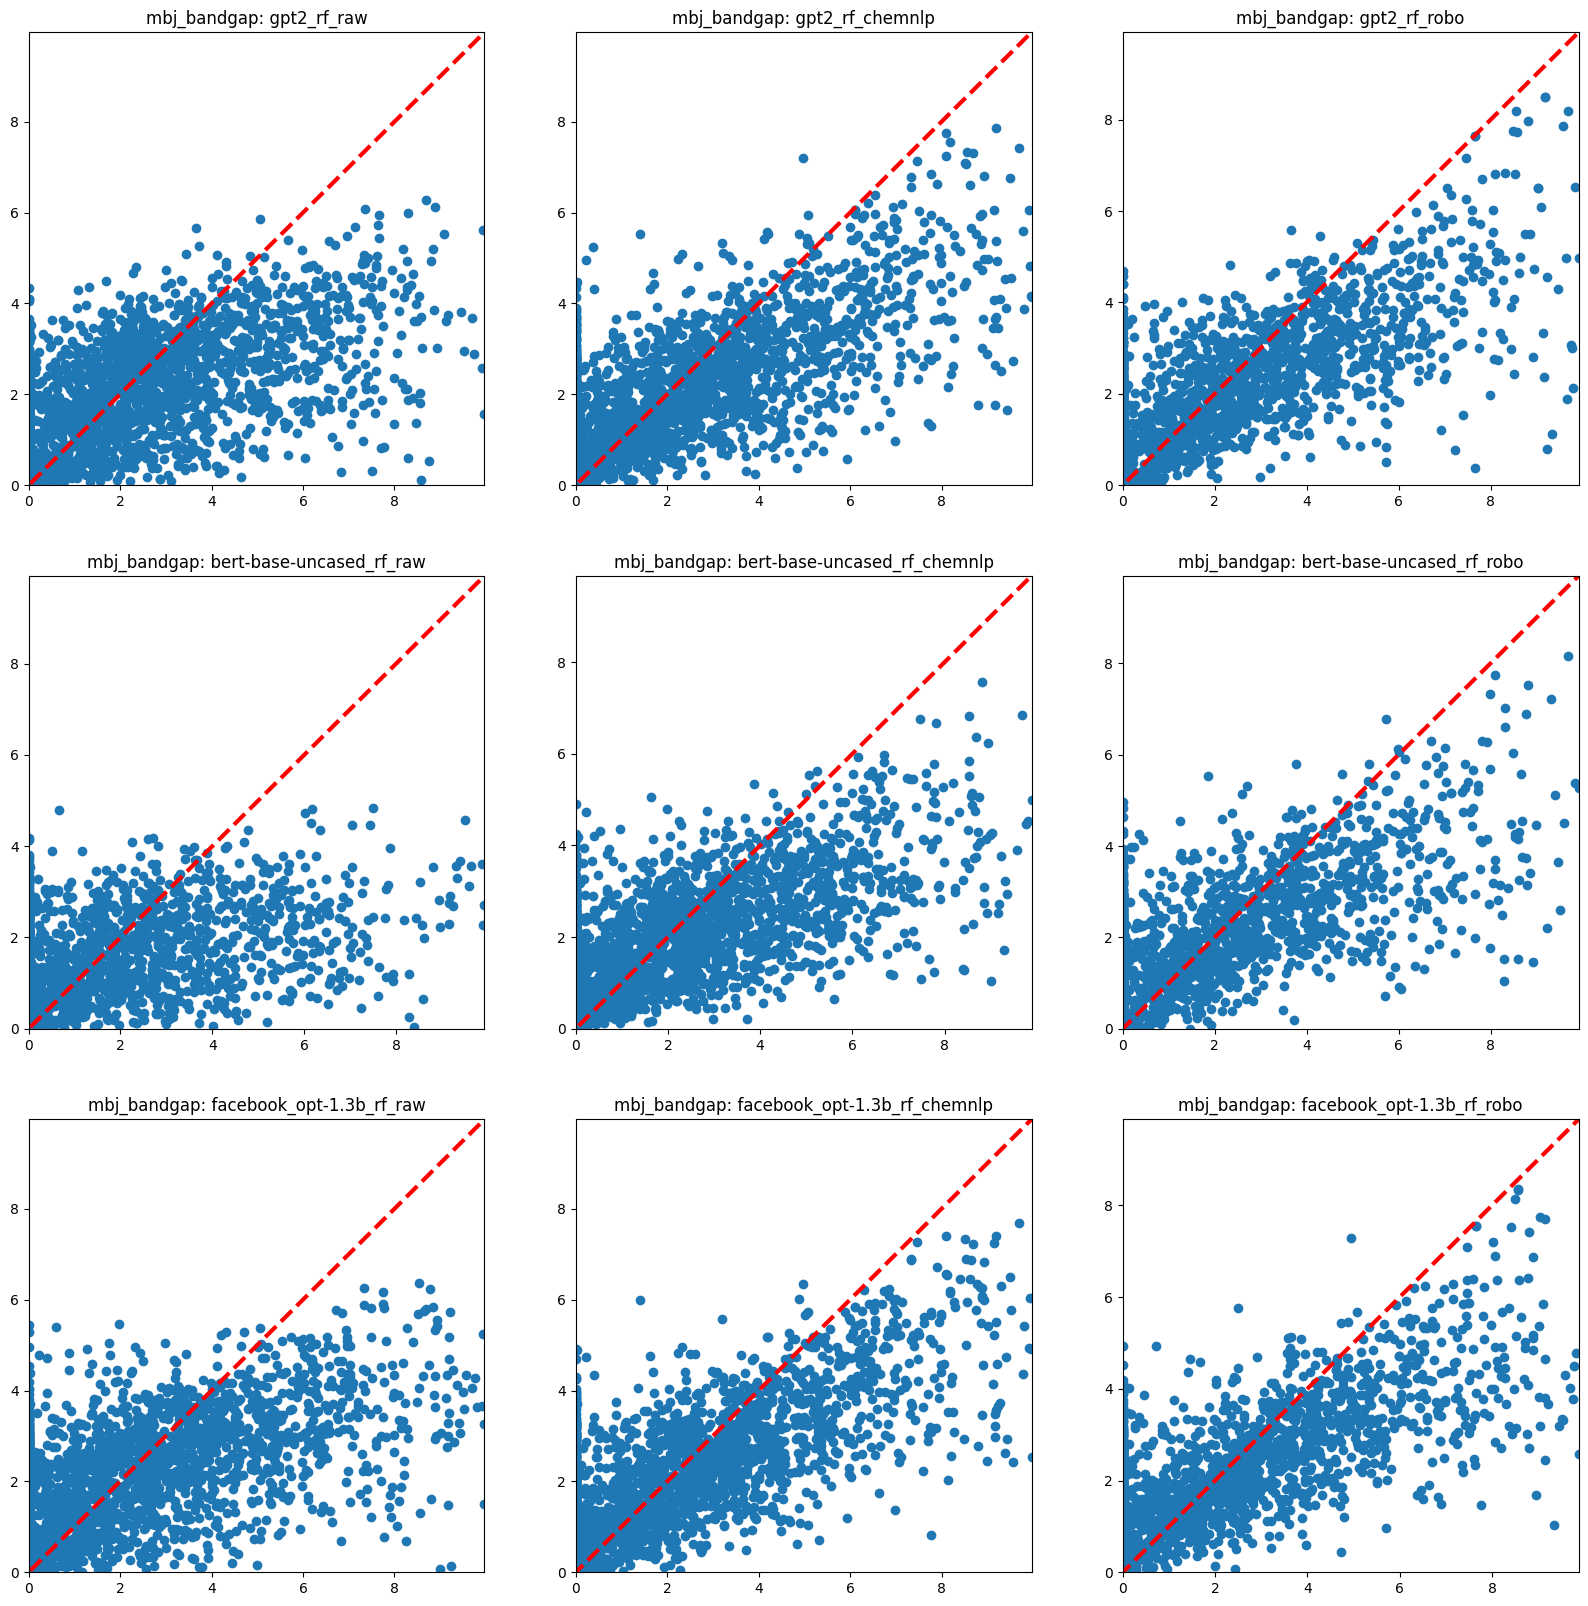

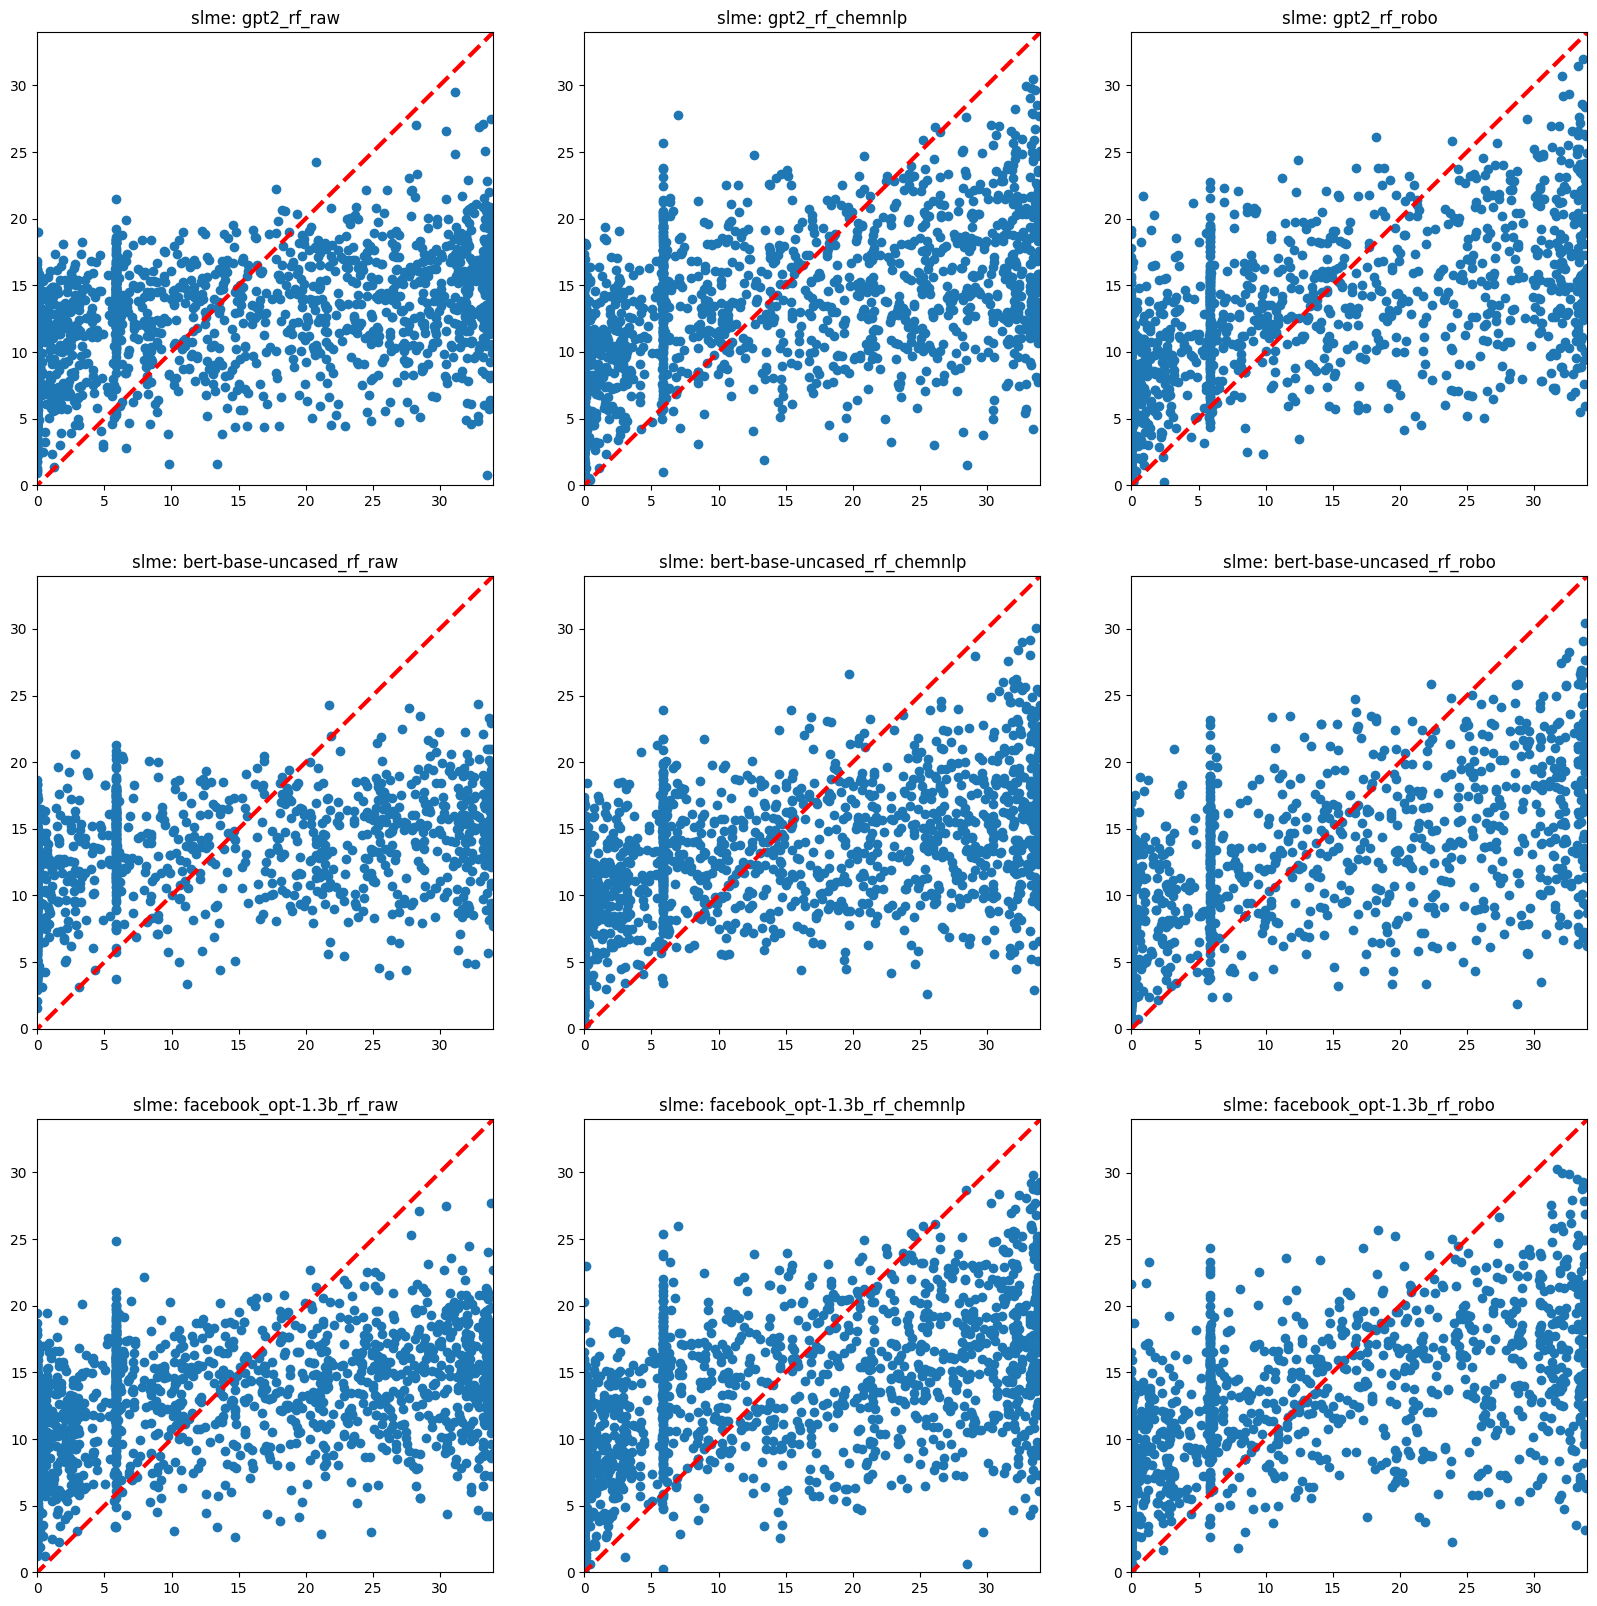

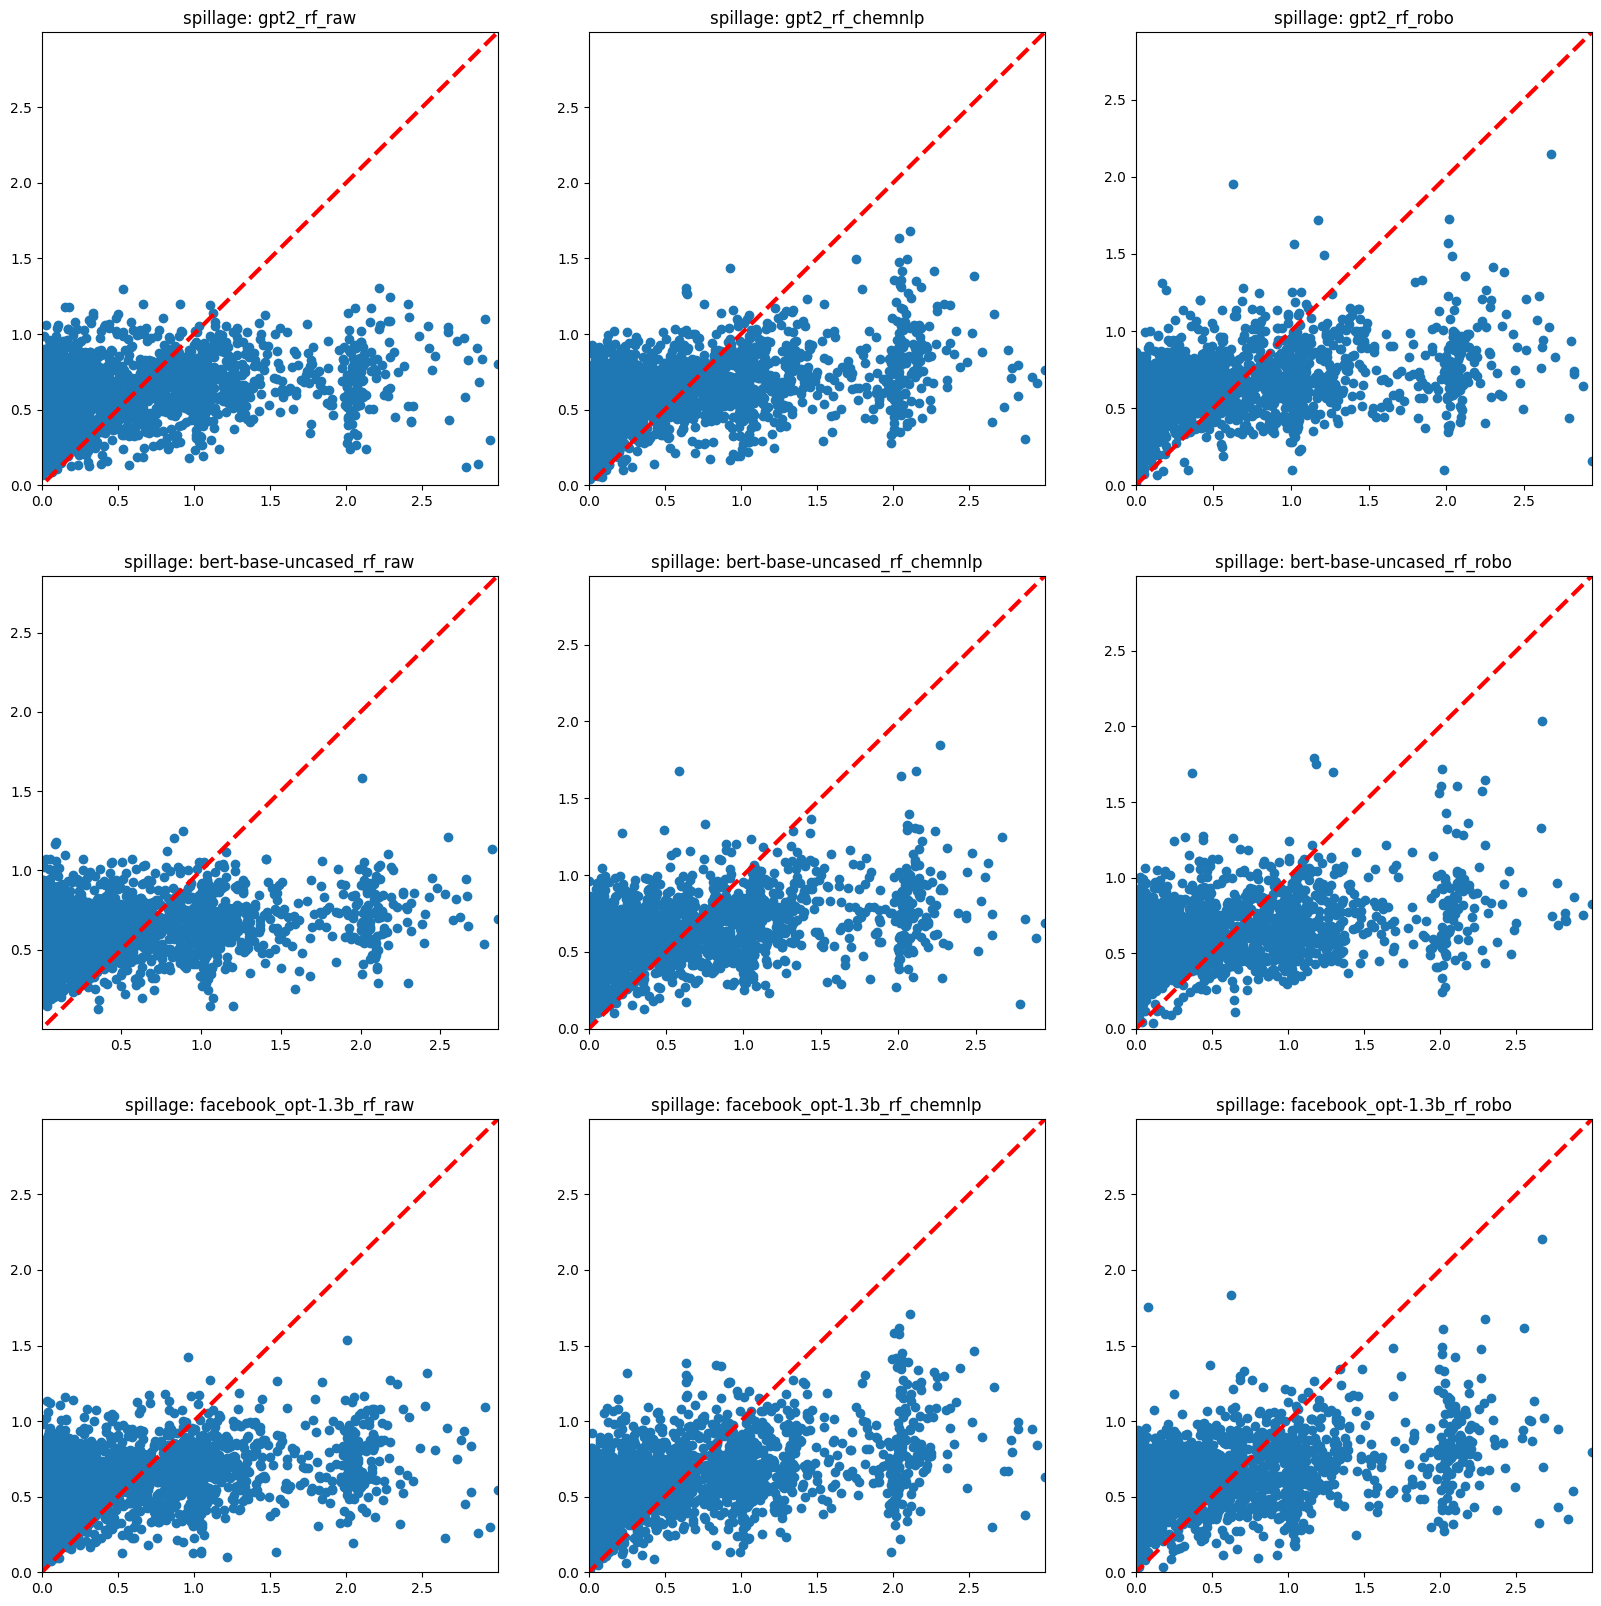

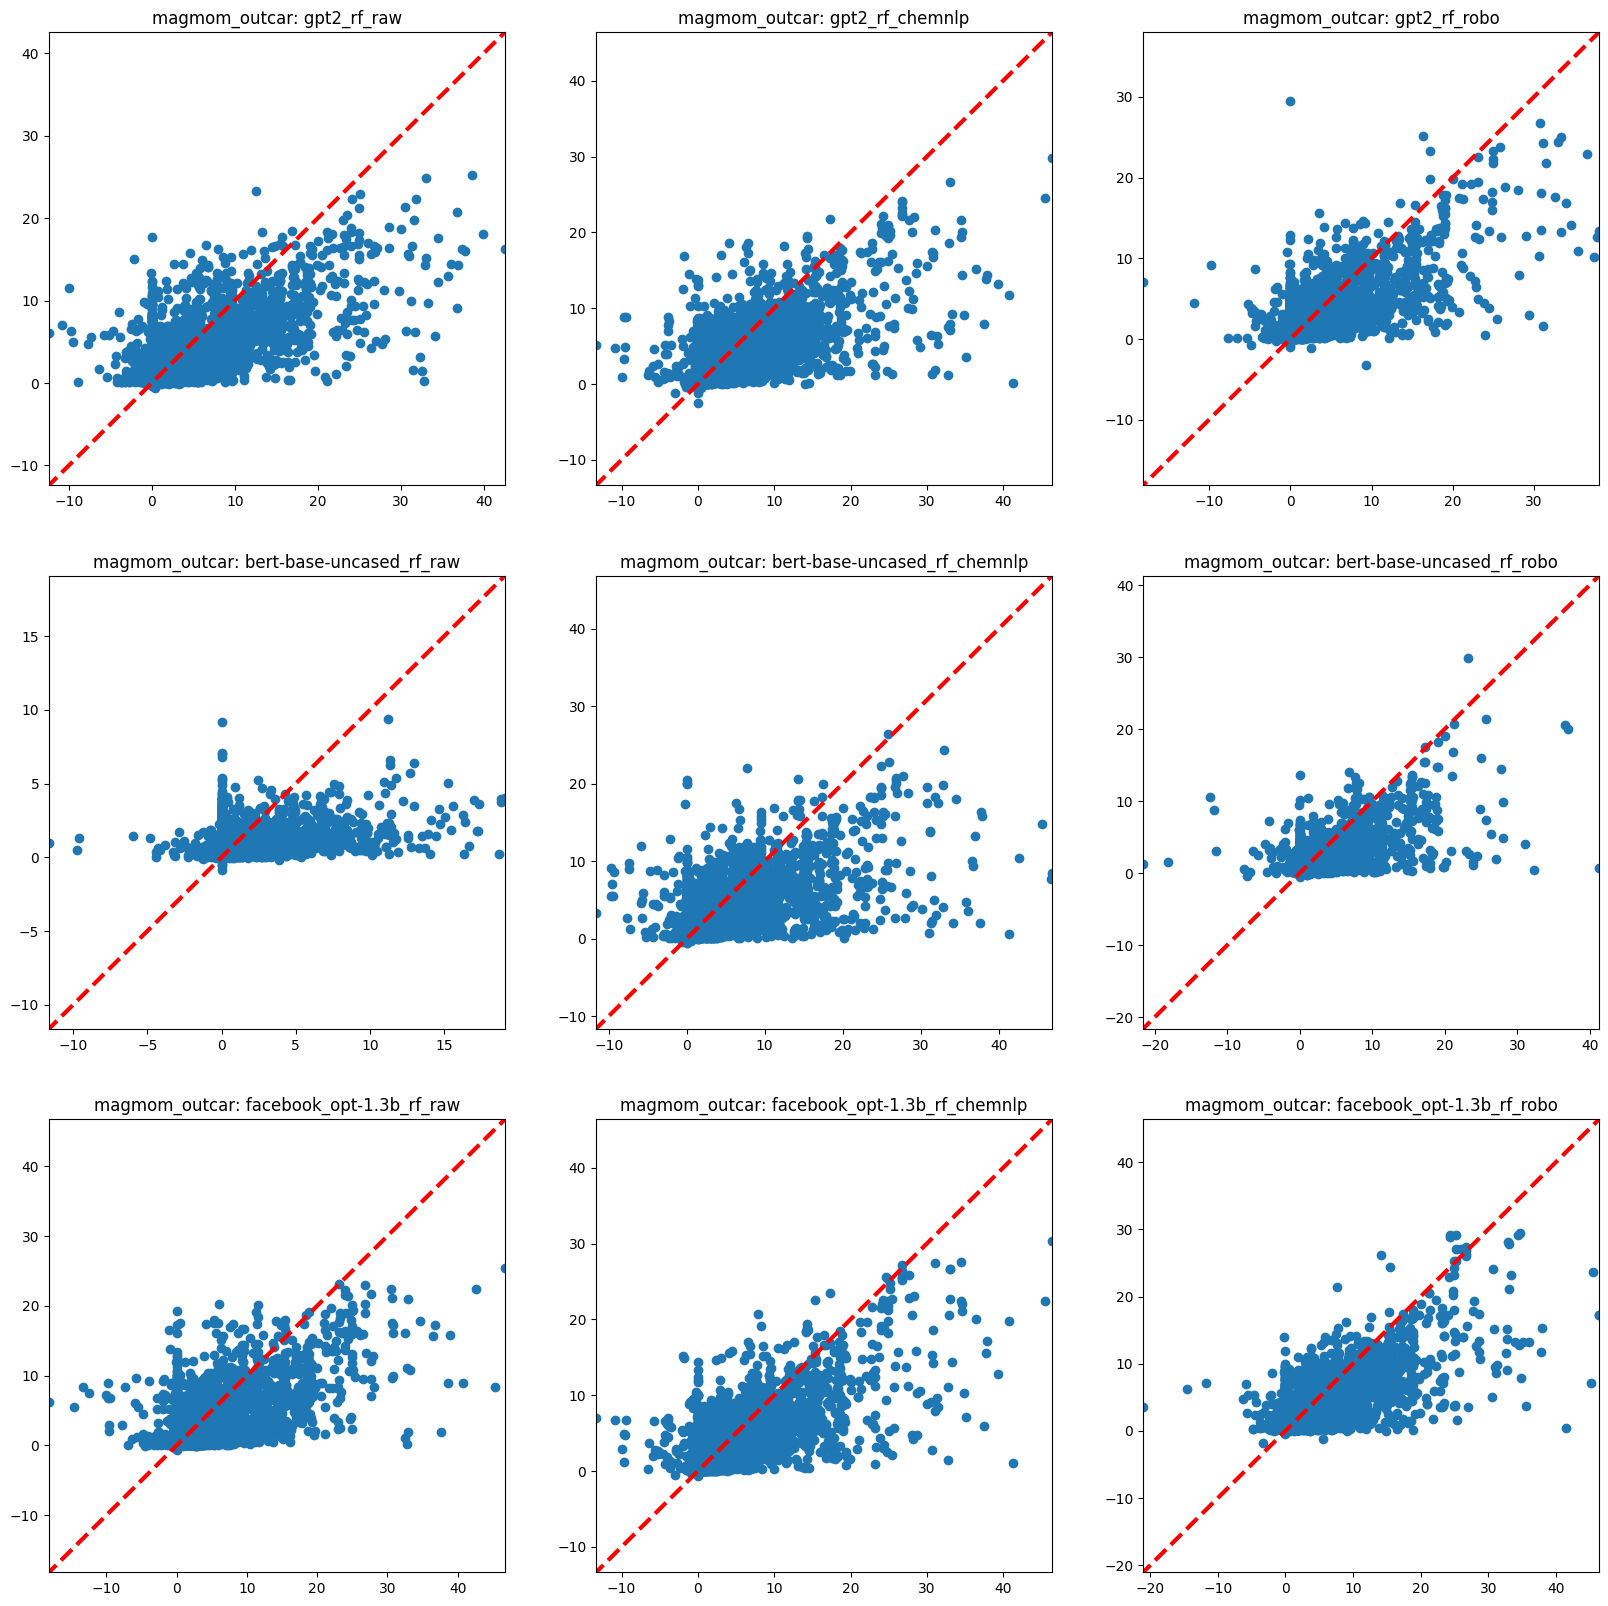

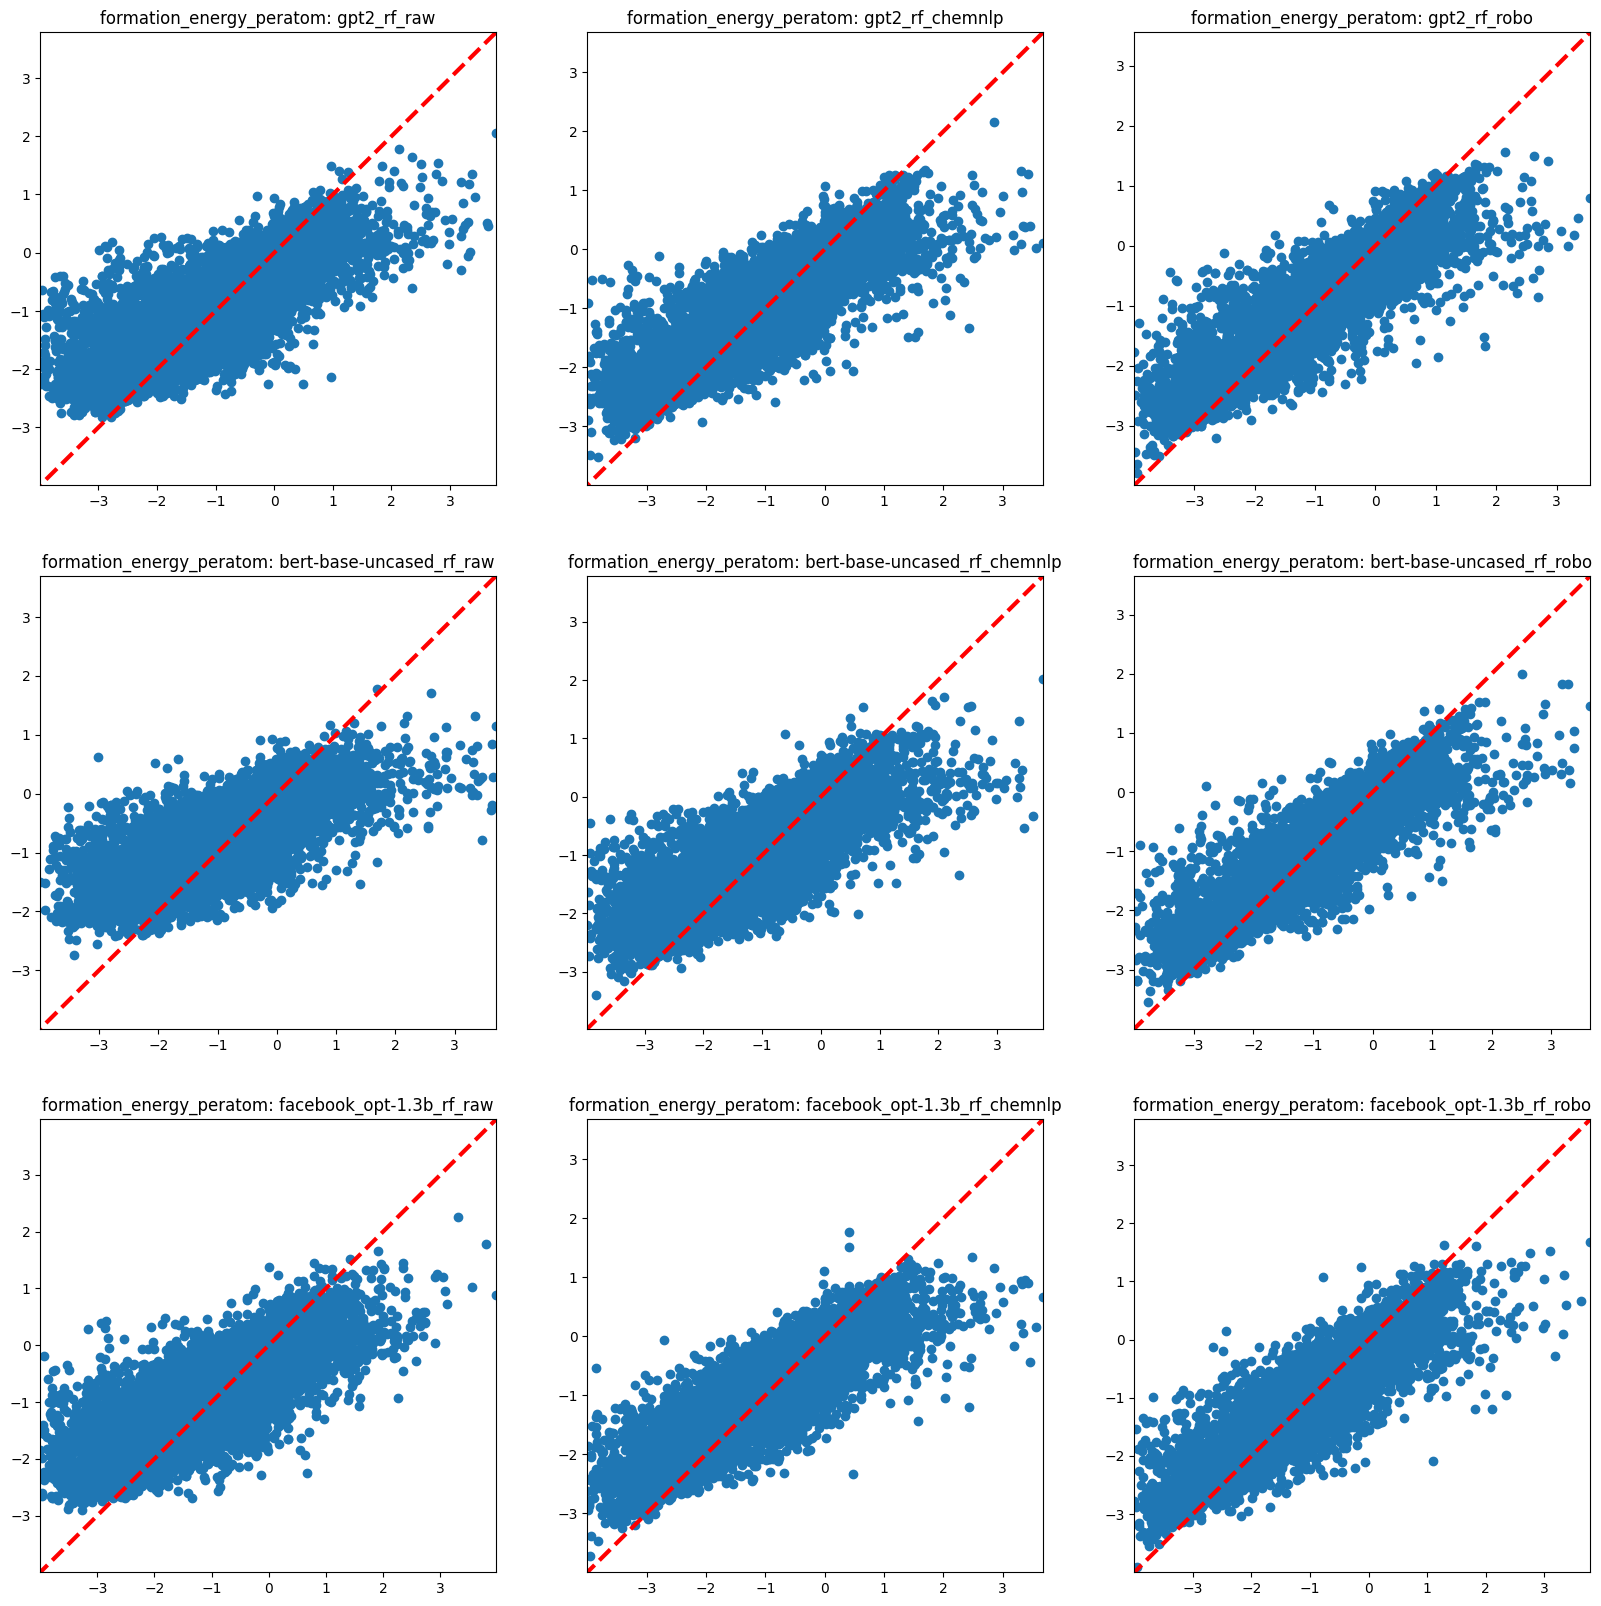

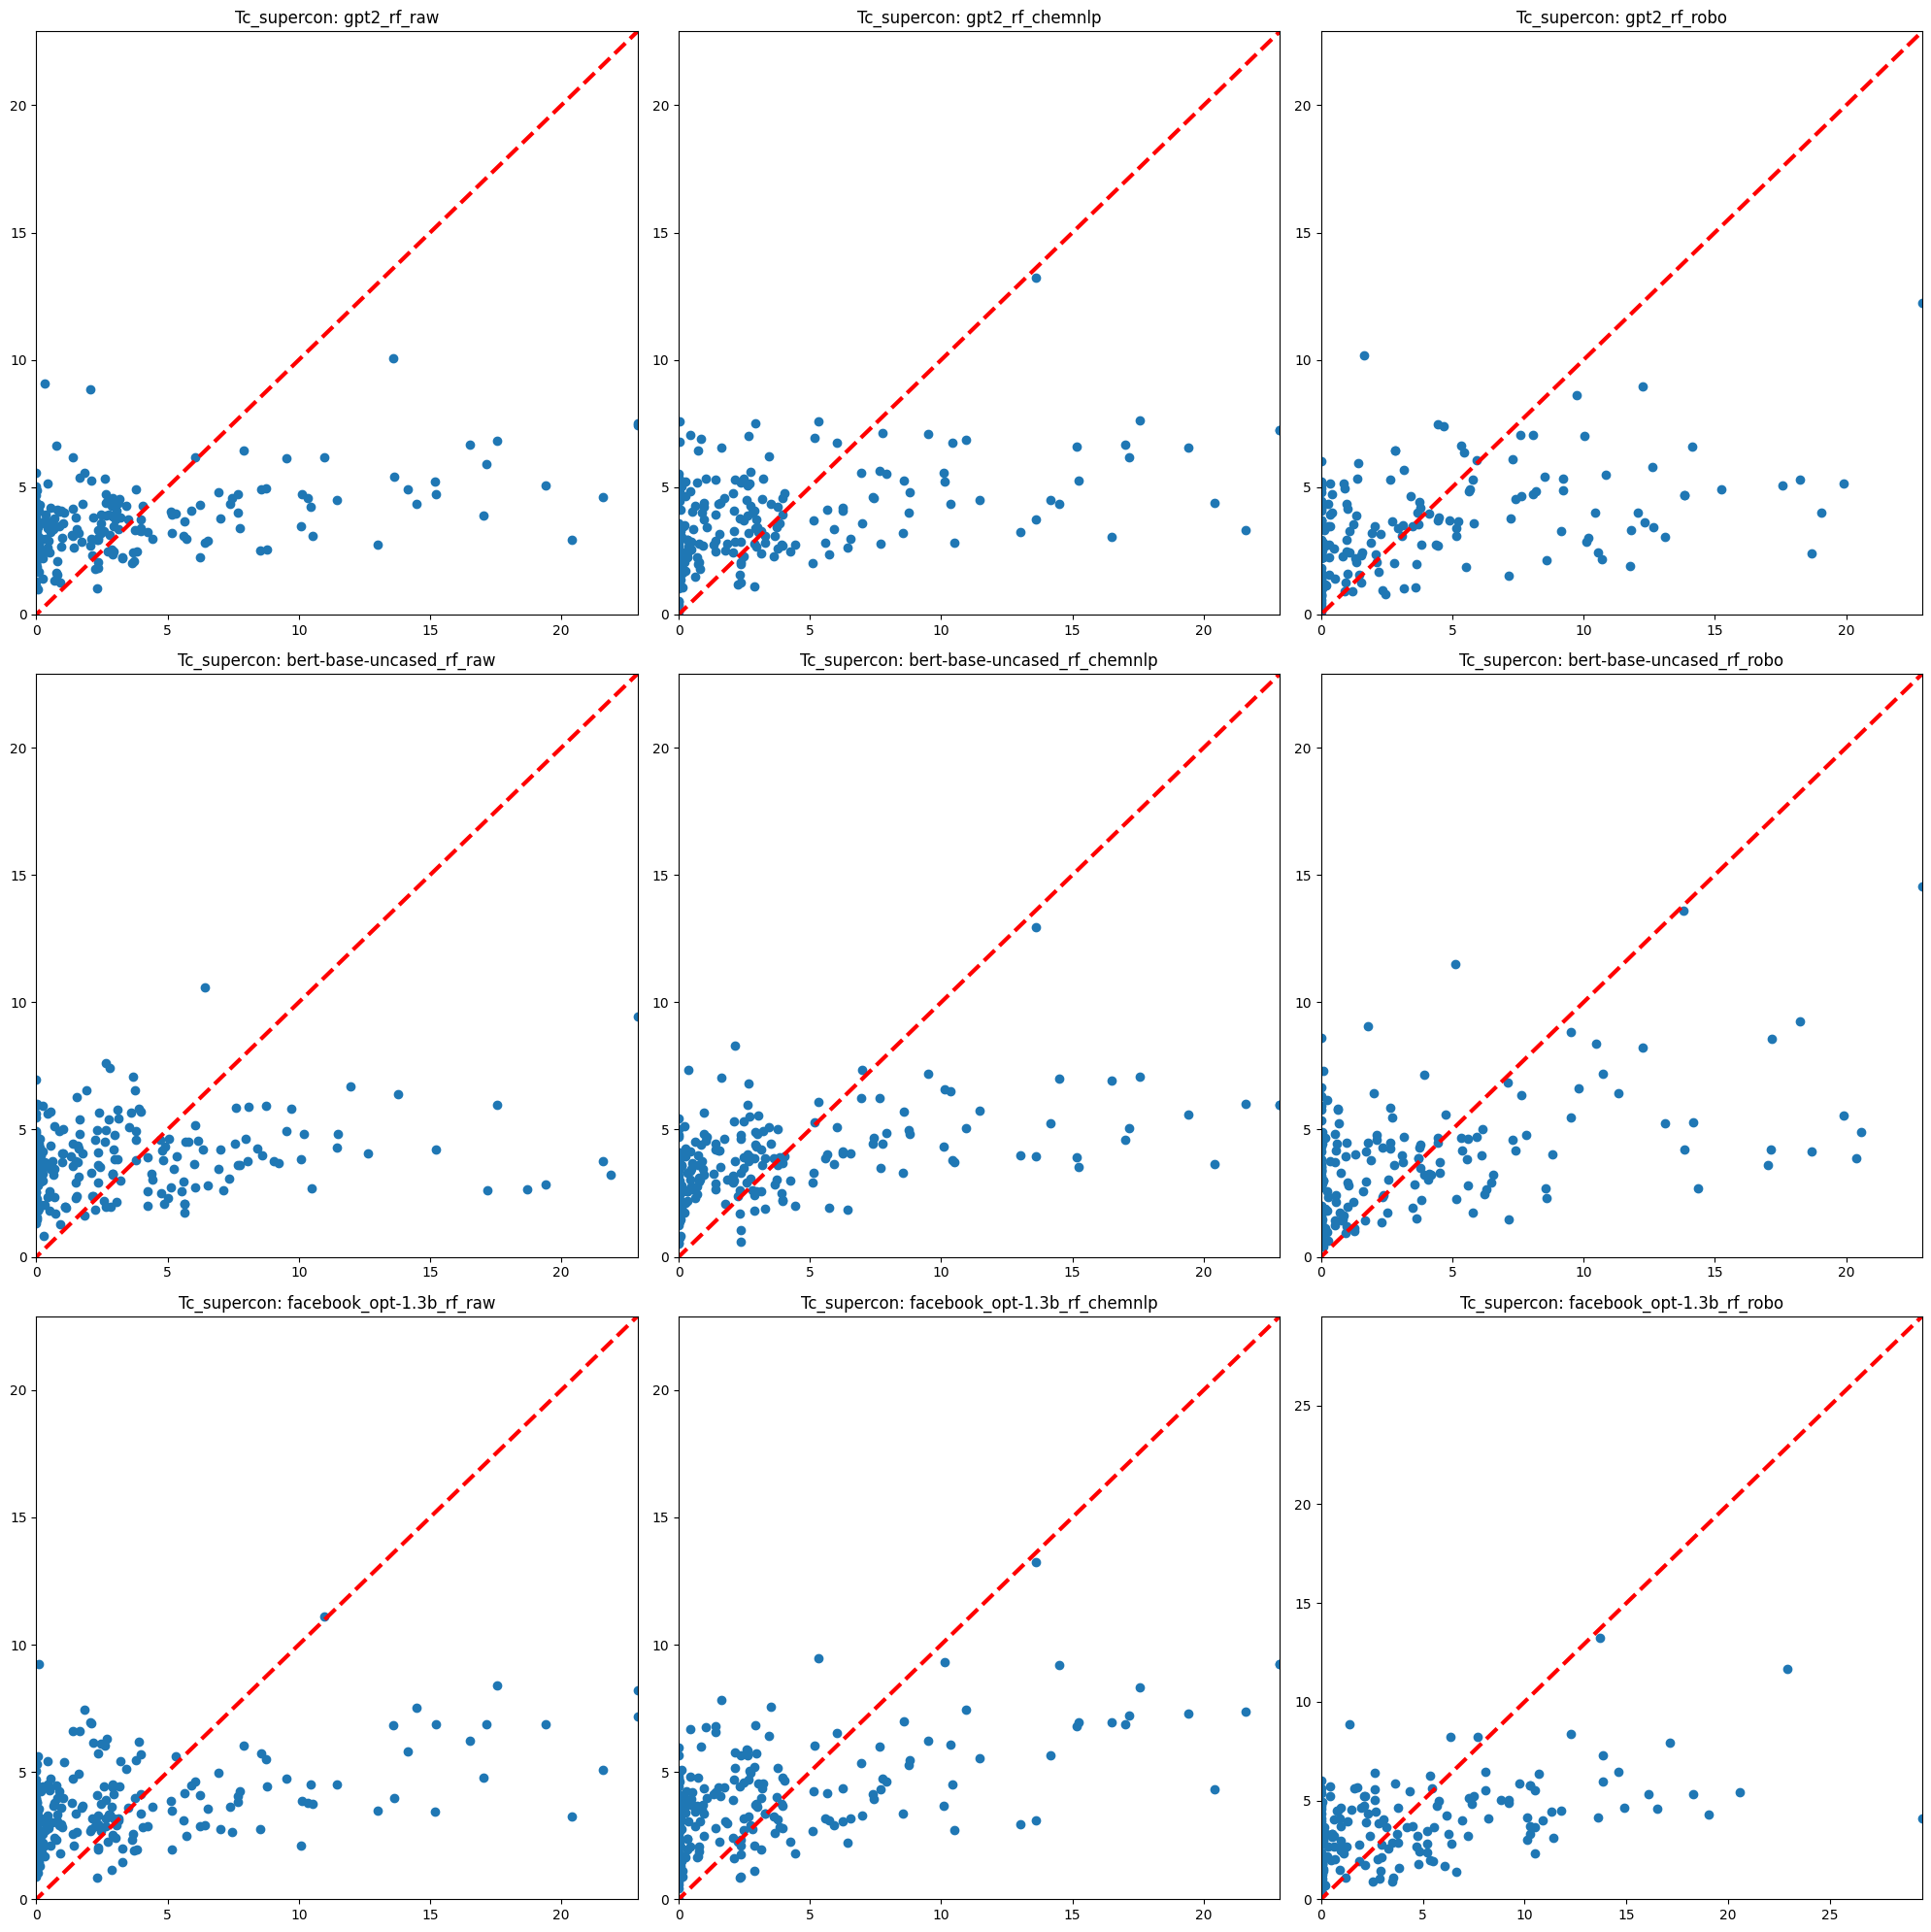

In [3]:


# Create a figure with 4x4 subplots
props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
rows = ["gpt2", "bert-base-uncased", "facebook_opt-1.3b"]
columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp", "ft_robo"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

for prop in props:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for i in range(n_rows):
        for j in range(n_cols):
            row = rows[i]
            col = columns[j]
            axes[i, j].set_title(f'{prop}: {row}_{col}', fontsize=12)
            filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
            try:
                df = pd.read_csv(os.path.join("pred", filename))
            except:
                pass
            else:
                preds = df["predictions"].values
                labels = df["labels"].values
                axes[i, j].scatter(labels, preds)
                axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
                axes[i, j].set_xlim(min(labels), max(labels))
                axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


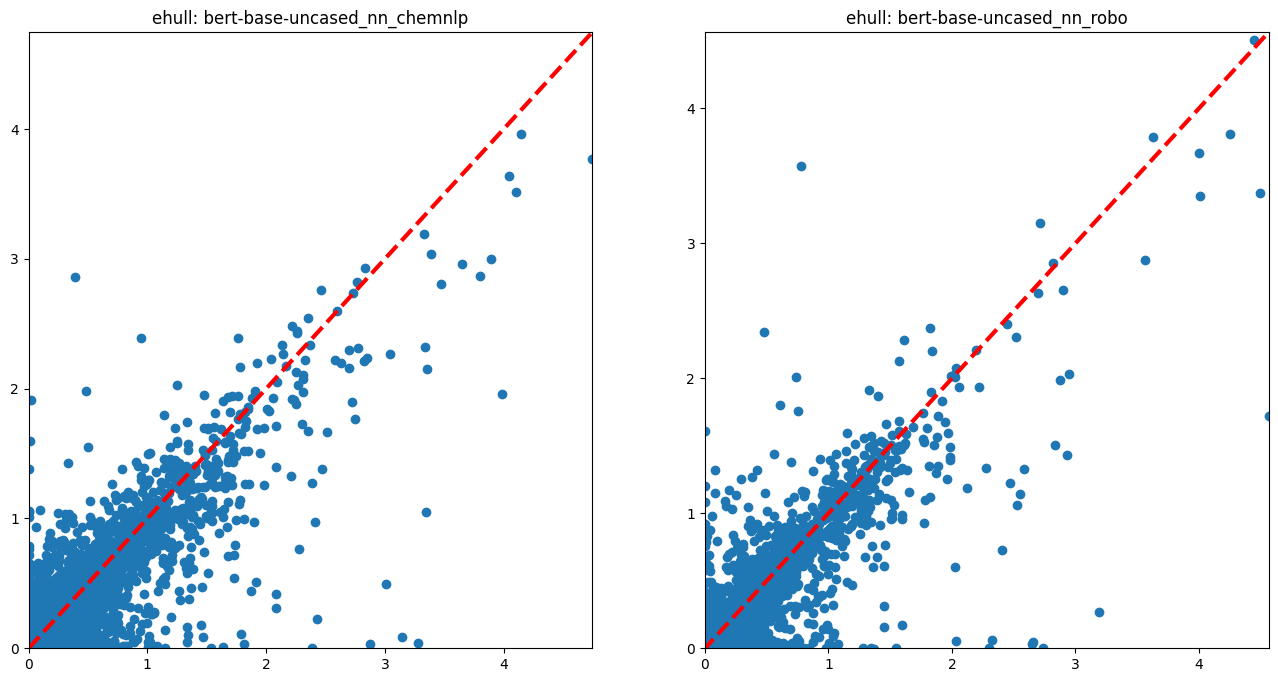

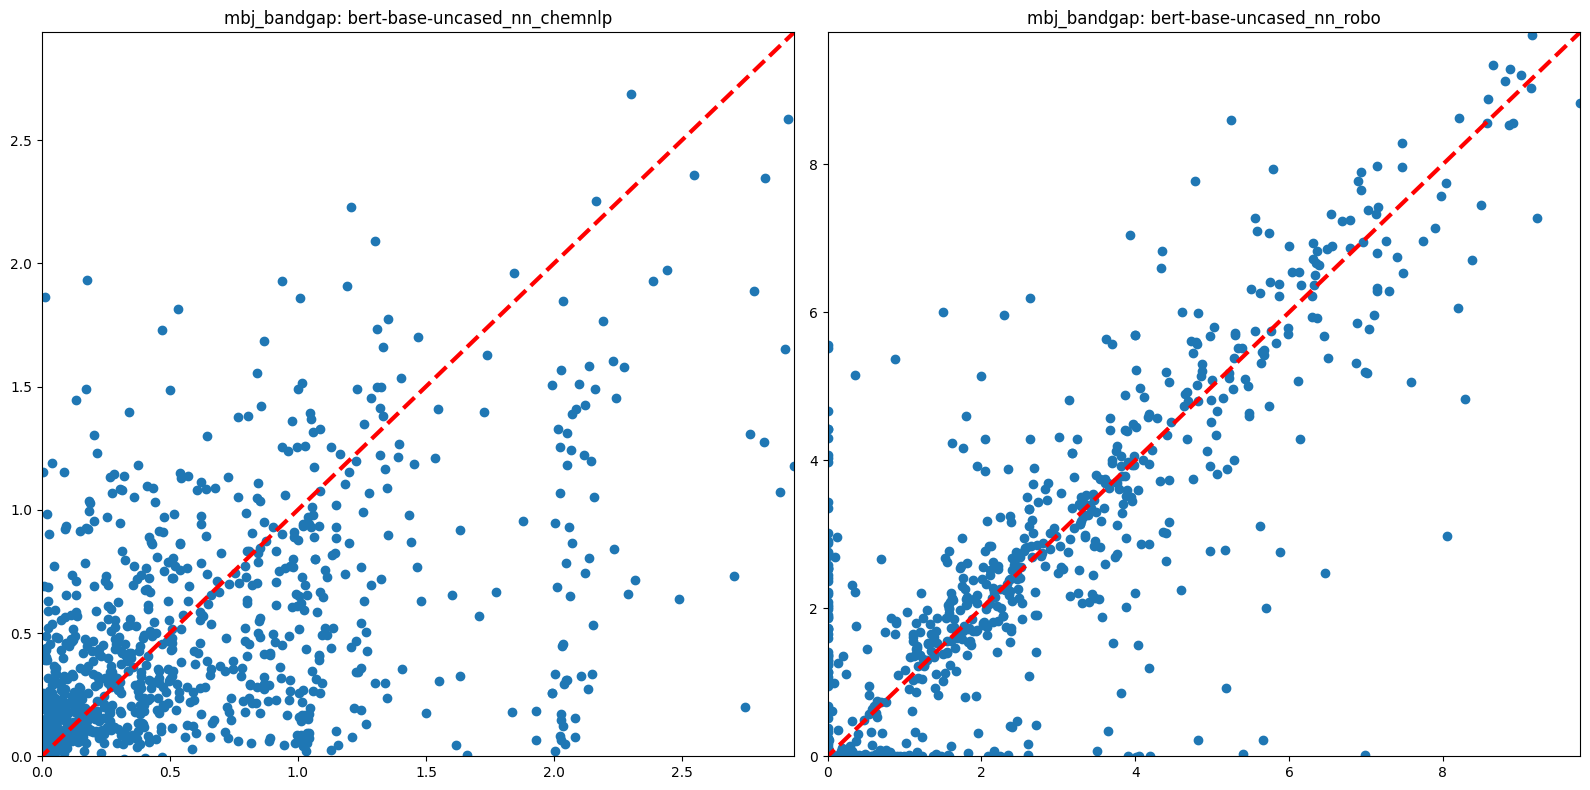

In [26]:


# Create a figure with 4x4 subplots
# props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
props = ['ehull','mbj_bandgap']
columns = ["nn_chemnlp", "nn_robo"]
rows = ["bert-base-uncased"]


# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

pred_dir = "/scratch/yll6162/CrossPropertyTL/pred/"
for prop in props:

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))
    for i in range(n_rows):
        for j in range(n_cols):
            if n_rows == 1:
                axe = axes[j]
            else:
                axe = axes[i, j]
            row = rows[i]
            col = columns[j]
            axe.set_title(f'{prop}: {row}_{col}', fontsize=12)
            
            filename = "_".join([row, col.split("_")[1], "prop", prop, "pred_otf"]) + '.csv'
            try:
                df = pd.read_csv(os.path.join(pred_dir, filename), index_col=0)
            except:
                pass
            else:
                preds = df["predictions"].values
                labels = df["labels"].values
                axe.scatter(labels, preds)
                axe.plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
                axe.set_xlim(min(labels), max(labels))
                axe.set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
mean_value = df_pred['labels'].mean()
absolute_deviations = abs(df_pred['labels'] - mean_value)
mad = absolute_deviations.mean()
mad

3.749196916087794

In [11]:
# df_gnn = pd.read_csv("/scratch/yll6162/ALIGNNTL/examples/jid/x+y+z/data0.csv")
df_gnn = pd.read_csv("/data/vgf3011/alignntldata/ehull/x+y+z/data0/data0_val_set.csv")
df_gnn

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,ehull,jid
0,0.179994,0.541180,-0.065556,-0.047824,0.004355,0.018097,0.059044,0.184160,-0.374341,-0.000237,...,0.289524,0.334266,0.061438,-0.361564,0.313448,-0.052575,0.096178,0.440682,1.415299,JVASP-60702.vasp
1,0.121468,-1.588013,-0.078624,-0.097578,0.254879,0.078112,-0.048283,-0.350240,-0.323912,0.204752,...,0.208685,0.420222,0.217769,0.092176,1.807412,-0.040859,0.481951,-0.044257,1.220379,JVASP-63912.vasp
2,-0.028033,1.389564,0.049527,-0.339569,0.105495,-0.006241,0.085347,2.500346,-0.147809,0.196560,...,0.021471,-0.251314,-0.390623,0.163994,-0.655393,0.127975,0.065785,-0.373177,1.222110,JVASP-48091.vasp
3,0.003594,0.138837,-0.009596,-0.186558,-0.076102,-0.034275,0.016629,0.423034,-0.274146,-0.017296,...,0.195816,0.182416,-0.012680,-0.418377,0.487437,-0.174266,0.024941,0.097760,3.449408,JVASP-29104.vasp
4,0.032980,-0.688578,0.062061,-0.090827,0.031993,0.000993,-0.108782,0.677942,-0.320396,0.212168,...,0.154266,0.332067,0.275622,0.100321,0.371792,-0.099770,0.435005,-0.208778,0.000000,JVASP-64512.vasp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,-0.130766,-0.840070,0.020666,0.013068,0.134020,-0.021664,0.011697,0.293309,0.498513,-0.087750,...,0.461130,0.098458,0.143361,0.158367,0.213360,-0.103858,0.160369,-0.228540,2.690562,JVASP-122058.vasp
5528,-0.102954,0.947392,0.028165,-0.354809,0.025282,0.061080,-0.066576,1.277328,-0.241518,-0.013232,...,0.500640,0.185117,0.165362,-0.085685,-0.024362,-0.038113,0.140635,-0.071771,0.766908,JVASP-123658.vasp
5529,0.083559,0.715546,-0.074653,-0.381127,-0.050430,-0.012297,-0.072305,0.970890,0.123385,0.031456,...,-0.459388,0.052893,0.087380,0.049209,0.426279,-0.097861,0.101592,0.198258,2.709798,JVASP-121095.vasp
5530,0.011667,1.105431,-0.035466,-0.167607,0.084810,0.033001,0.016359,1.204702,-0.378548,-0.097251,...,0.488780,0.281060,0.123699,-0.343141,0.170640,-0.155294,0.195068,-0.141259,1.980277,JVASP-123668.vasp
